Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [9]:
X=df.drop(labels=["target"],axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
y=df["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [12]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
classifier=RandomForestClassifier(n_estimators=100,max_depth=10)

In [15]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [16]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1])

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [18]:
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Accuracy score:  0.8241758241758241


In [19]:
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

Confusion Matrix:  [[32  9]
 [ 7 43]]


In [20]:
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

In [21]:
feature_importances=list(classifier.feature_importances_)
feature_importances

[0.0757462327746277,
 0.028986215872285295,
 0.11624814151661413,
 0.06692243320439388,
 0.08370183167191457,
 0.011552201031412196,
 0.022763445194770245,
 0.10125994745146913,
 0.07155466671879282,
 0.10253003010506663,
 0.05147462443623478,
 0.1478538287610697,
 0.11940640126134883]

In [22]:
features=list(df.columns)
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [23]:
featuresdict=dict(zip(features,feature_importances))
featuresdict

{'age': 0.0757462327746277,
 'sex': 0.028986215872285295,
 'cp': 0.11624814151661413,
 'trestbps': 0.06692243320439388,
 'chol': 0.08370183167191457,
 'fbs': 0.011552201031412196,
 'restecg': 0.022763445194770245,
 'thalach': 0.10125994745146913,
 'exang': 0.07155466671879282,
 'oldpeak': 0.10253003010506663,
 'slope': 0.05147462443623478,
 'ca': 0.1478538287610697,
 'thal': 0.11940640126134883}

In [24]:
featuresdictsorted=sorted(featuresdict.items(), key=lambda x:x[1],reverse=True)
featuresdictsorted

[('ca', 0.1478538287610697),
 ('thal', 0.11940640126134883),
 ('cp', 0.11624814151661413),
 ('oldpeak', 0.10253003010506663),
 ('thalach', 0.10125994745146913),
 ('chol', 0.08370183167191457),
 ('age', 0.0757462327746277),
 ('exang', 0.07155466671879282),
 ('trestbps', 0.06692243320439388),
 ('slope', 0.05147462443623478),
 ('sex', 0.028986215872285295),
 ('restecg', 0.022763445194770245),
 ('fbs', 0.011552201031412196)]

In [25]:
top5features=[]
top5featuesscore=[]
for i in range(5):
    top5features.append(featuresdictsorted[i][0])
    top5featuesscore.append(featuresdictsorted[i][1])
top5featuesscore

[0.1478538287610697,
 0.11940640126134883,
 0.11624814151661413,
 0.10253003010506663,
 0.10125994745146913]

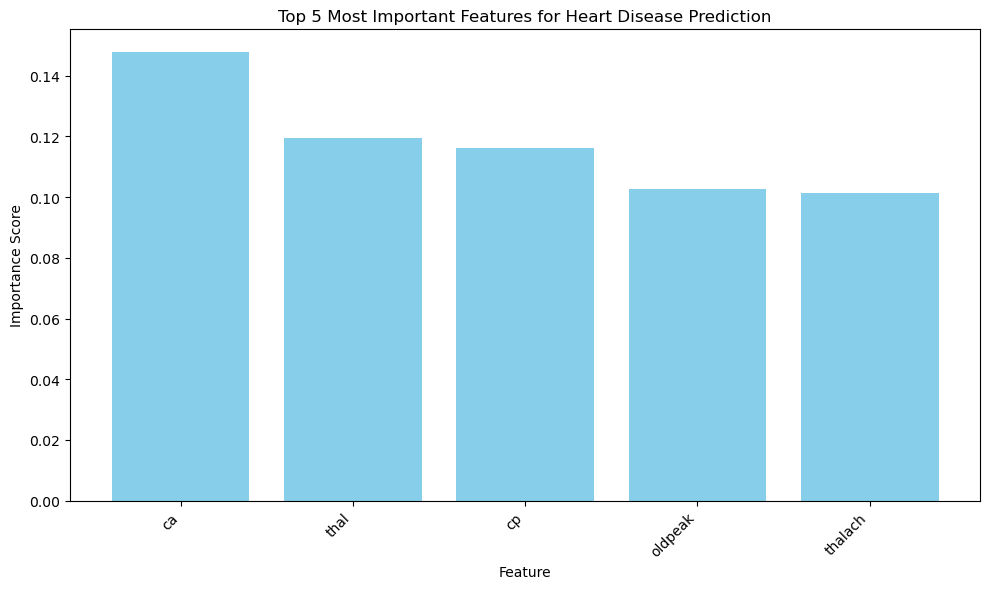

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(top5features,top5featuesscore, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 5 Most Important Features for Heart Disease Prediction')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [27]:
params={
    "n_estimators":[100,500,1000],
    "max_depth":[3,5,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    }

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
gscv=GridSearchCV(classifier,param_grid=params,cv=5,verbose=3,scoring="accuracy")

In [30]:
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.907 total time=   0.2s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.2s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.2s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.860 total time=   1.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.860 total time=   0.9s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.738 total time=   1.0s
[

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy', verbose=3)

In [31]:
gscv.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [32]:
y_pred=gscv.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1])

In [33]:
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Accuracy score:  0.8351648351648352


In [34]:
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

Confusion Matrix:  [[32  9]
 [ 6 44]]


In [35]:
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [36]:
top2features=[]
top2featuesscore=[]
for i in range(2):
    top2features.append(featuresdictsorted[i][0])
    top2featuesscore.append(featuresdictsorted[i][1])
top2featuesscore

[0.1478538287610697, 0.11940640126134883]

In [37]:
top2features

['ca', 'thal']

In [38]:
X=df[['ca', 'oldpeak']]
X.head()

,ca,oldpeak
0,0,2.3
1,0,3.5
2,0,1.4
3,0,0.8
4,0,0.6


In [39]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [54]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap=cmap, edgecolors='k')

In [50]:
rfc=RandomForestClassifier()

In [51]:
rfc.fit(X,y)

RandomForestClassifier()

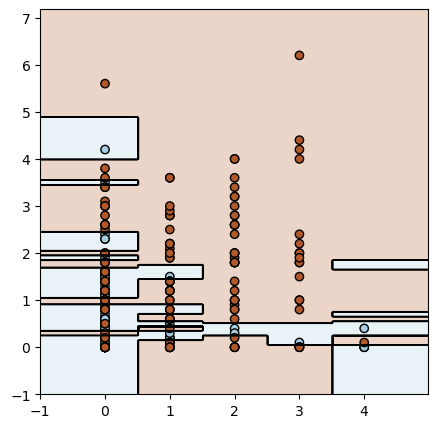

In [55]:
plot_decision_boundary(rfc, X, y)